## Análise e interpretação dos dados fornecidos para o projeto final

### Importando bibliotecas que serão usadas

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

### Leitura e visualização dos datasets

In [21]:
df1 = pd.read_csv('../data/estaticos_portfolio1.csv',index_col = 0)
df2 = pd.read_csv('../data/estaticos_portfolio2.csv',index_col = 0)
df3 = pd.read_csv('../data/estaticos_portfolio3.csv',index_col = 0)
mkt = pd.read_csv('../data/estaticos_market.csv',index_col = 0)
df2 = pd.merge(df2,mkt, on='id', how='inner')
df3 = pd.merge(df3,mkt, on='id', how='inner')

In [24]:
## numero de entradas
mkt.shape

(462298, 181)

In [25]:
## corpo do dataset
mkt.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Verificando o número de registros faltantes em cada feature

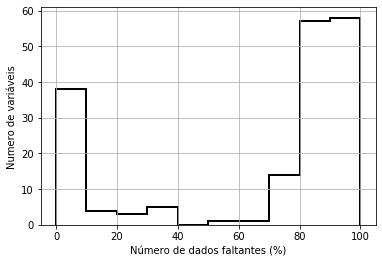

In [26]:
plt.hist(100*(mkt.isnull().sum(axis=0))/mkt.shape[0],bins = 10,histtype='step',color = 'black',linewidth = 2.)
plt.xlabel('Número de dados faltantes (%)')
plt.ylabel('Numero de variáveis')
plt.grid()

### Como primeiro passo, eliminarei as variáveis com 70% dos dados faltantes (não faz sentido trabalhar com um parâmetro que quase não possui estatística). Coloquei a porcentagem de corte como ajustável, logo podemos aumentar ou diminuir esse threshold.

In [27]:
threshold = 0.7   ## pegar colunas maior que 95%
nan_num   = (mkt.isnull().sum(axis = 0))/mkt.shape[0]  ## calculo da porcentagem de registros null para cada coluna
var_nans  = mkt.columns[nan_num>=threshold] ## pega nome das colunas maiores que a porcentagem definida
print('Variaveis que serão removidas total:'+str(var_nans.shape[0])+'\n ',var_nans)

Variaveis que serão removidas total:129
  Index(['vl_total_tancagem', 'vl_total_veiculos_antt',
       'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota',
       ...
       'min_meses_servicos_all', 'media_meses_servicos', 'max_meses_servicos',
       'min_meses_servicos', 'qt_funcionarios', 'qt_funcionarios_12meses',
       'qt_funcionarios_24meses', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'tx_rotatividade'],
      dtype='object', length=129)


### Removendo váriaveis 

In [28]:
mkt.drop(labels=var_nans,axis=1,inplace=True)    

In [29]:
## Database com features removidas
mkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Data columns (total 52 columns):
id                                       462298 non-null object
fl_matriz                                462298 non-null bool
de_natureza_juridica                     462298 non-null object
sg_uf                                    462298 non-null object
natureza_juridica_macro                  462298 non-null object
de_ramo                                  462298 non-null object
setor                                    460371 non-null object
idade_empresa_anos                       462298 non-null float64
idade_emp_cat                            462298 non-null object
fl_me                                    462298 non-null bool
fl_sa                                    462298 non-null bool
fl_epp                                   462298 non-null bool
fl_mei                                   462298 non-null bool
fl_ltda                                  462298 non-null bool
dt_s

In [30]:
## Colunas deletadas por correlação vista do profiling ou por redundancia de informacao
drop_by_pd_profiling = ['fl_epp',
 'qt_socios_pf',
 'idade_maxima_socios',
 'idade_minima_socios',
 'qt_socios_st_regular',
 'qt_socios_masculino',
 'de_saude_rescencia',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo',
 'vl_faturamento_estimado_grupo_aux',
 'idade_emp_cat',
 'de_saude_rescencia'
]
mkt.drop(labels=drop_by_pd_profiling,axis=1,inplace=True)    

#### Colunas escolhidas

In [35]:
keys_chosen = mkt.columns

In [36]:
df1_filt = df1[keys_chosen]
df2_filt = df2[keys_chosen]
df3_filt = df3[keys_chosen]

### Análise Exploratória dos dados II: Que váriaveis definem um cliente? 

In [37]:
## rotulando os dados
df1_filt['target'] = np.ones(df1_filt.shape[0]).astype(np.int)
df2_filt['target'] = 2*np.ones(df2_filt.shape[0]).astype(np.int)
df3_filt['target'] = 3*np.ones(df3_filt.shape[0]).astype(np.int)

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [39]:
df_filt = pd.concat([df1_filt,df2_filt,df3_filt],ignore_index=True)
df_filt.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,fl_me,fl_sa,...,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pj,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,qt_filiais,target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,False,False,...,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,False,1.0,0.0,45.0,NaN,210000.0,0,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,False,False,...,CENTRO MARANHENSE,MEDIO MEARIM,False,NaN,NaN,NaN,NaN,210000.0,4,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,False,False,...,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,False,1.0,0.0,54.0,1.0,50000.0,0,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,False,False,...,OESTE POTIGUAR,UMARIZAL,False,1.0,0.0,40.0,NaN,50000.0,0,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,18.726027,False,False,...,LESTE POTIGUAR,NATAL,False,2.0,0.0,33.0,1.0,3029140.8,3,1


##### Verificação de variáveis seguimentadas

In [41]:
df_filt['de_natureza_juridica'].unique()

array(['EMPRESARIO INDIVIDUAL', 'SOCIEDADE EMPRESARIA LIMITADA',
       'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
       'SOCIEDADE EMPRESARIA EM NOME COLETIVO',
       'SOCIEDADE ANONIMA FECHADA', 'SOCIEDADE EM CONTA DE PARTICIPACAO',
       'AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL', 'MUNICIPIO',
       'SOCIEDADE SIMPLES LIMITADA', 'CONDOMINIO EDILICIO',
       'ASSOCIACAO PRIVADA',
       'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL', 'FUNDACAO PRIVADA',
       'FUNDO PUBLICO', 'ENTIDADE SINDICAL', 'COOPERATIVA',
       'AUTARQUIA MUNICIPAL', 'AUTARQUIA FEDERAL',
       'SOCIEDADE DE ECONOMIA MISTA',
       'ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL',
       'SERVICO SOCIAL AUTONOMO', 'SOCIEDADE ANONIMA ABERTA',
       'FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL',
       'ORGANIZACAO RELIGIOSA',
   

In [44]:
df_filt['natureza_juridica_macro'].unique()

array(['OUTROS', 'ENTIDADES EMPRESARIAIS', 'ADMINISTRACAO PUBLICA',
       'ENTIDADES SEM FINS LUCRATIVOS'], dtype=object)

###### Acho melhor usar natureza_juridica_macro ao inves de de_natureza_juridica devido a grande seguimentação 

In [46]:
df_filt['de_ramo'].unique()

array(['COMERCIO VAREJISTA', 'BENS DE CONSUMO',
       'ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL',
       'SERVICOS DE EDUCACAO', 'PRODUTOS DE AGROPECUARIA',
       'SERVICOS ADMINISTRATIVOS', 'COMERCIO POR ATACADO',
       'INDUSTRIA DA CONSTRUCAO',
       'SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS',
       'QUIMICA-PETROQUIMICA', 'SERVICOS DE SANEAMENTO BASICO',
       'COMERCIO E REPARACAO DE VEICULOS',
       'SERVICOS DE ALOJAMENTO/ALIMENTACAO',
       'TRANSPORTE, ARMAZENAGEM E CORREIO', 'SERVICOS DE SAUDE',
       'TELECOM', 'SERVICOS DIVERSOS',
       'SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE',
       'INDUSTRIA AUTOMOTIVA', 'PAPEL E CELULOSE', 'ELETROELETRONICOS',
       'INDUSTRIA DIGITAL', 'SIDERURGICA-METALURGIA',
       'INDUSTRIAS EXTRATIVAS', 'ATIVIDADES IMOBILIARIAS',
       'ELETRICIDADE E GAS', 'TEXTEIS', 'SERVICOS FINANCEIROS',
       'CULTURA, ESPORTE E RECREACAO', 'SERVICOS SOCIAIS'], dtype=object)

In [48]:
df_filt['setor'].unique()

array(['COMERCIO', 'INDUSTRIA', 'SERVIÇO', 'AGROPECUARIA',
       'CONSTRUÇÃO CIVIL'], dtype=object)

###### O mesmo pode ser feito para o setor (ao inves do ramo)

## Análise das va's numéricas

In [50]:
df_filt.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pj,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,qt_filiais,target
count,1386.000000,1386.000000,1386.000000,1338.000000,1118.000000,888.000000,888.000000,808.000000,430.000000,1.361000e+03,1386.000000,1386.000000
mean,20.389162,6.083694,7.046898,24.757100,1481.646986,2.363739,0.108108,46.979529,1.467442,5.486137e+07,2.386003,1.790765
std,14.168201,28.064988,25.755389,7.757548,1189.500813,6.706398,0.421547,13.005356,3.983370,1.722873e+08,13.836030,0.740437
min,0.052055,0.000000,0.000000,7.000000,110.300000,1.000000,0.000000,4.000000,1.000000,0.000000e+00,0.000000,1.000000
25%,8.234932,0.000000,0.000000,23.000000,708.552500,1.000000,0.000000,37.916667,1.000000,2.100000e+05,0.000000,1.000000
50%,18.921918,0.000000,0.000000,23.000000,1062.670000,2.000000,0.000000,47.000000,1.000000,1.926698e+07,0.000000,2.000000
75%,29.510274,3.000000,5.000000,24.000000,1818.107500,2.000000,0.000000,56.000000,1.000000,4.425224e+07,1.000000,2.000000
max,55.126027,663.000000,371.000000,54.000000,8467.070000,139.000000,5.000000,90.000000,59.000000,3.490930e+09,374.000000,3.000000


In [80]:
numeric_keys = df_filt.columns[~(df_filt.dtypes.values == 'O')]
df_filt_only_numeric = df_filt[numeric_keys]
df_filt_only_numeric.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pj,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,qt_filiais,target
0,True,0.646575,False,False,True,False,False,False,False,0.0,0.0,NaN,379.96,1.0,0.0,45.0,NaN,210000.0,0,1
1,False,6.586301,False,False,False,False,False,True,True,0.0,0.0,22.0,1865.61,NaN,NaN,NaN,NaN,210000.0,4,1
2,True,8.010959,False,False,True,False,False,False,False,0.0,0.0,24.0,798.12,1.0,0.0,54.0,1.0,50000.0,0,1
3,True,20.863014,False,False,False,False,False,False,False,0.0,0.0,26.0,608.47,1.0,0.0,40.0,NaN,50000.0,0,1
4,True,18.726027,False,False,False,False,False,True,True,0.0,0.0,23.0,880.71,2.0,0.0,33.0,1.0,3029140.8,3,1


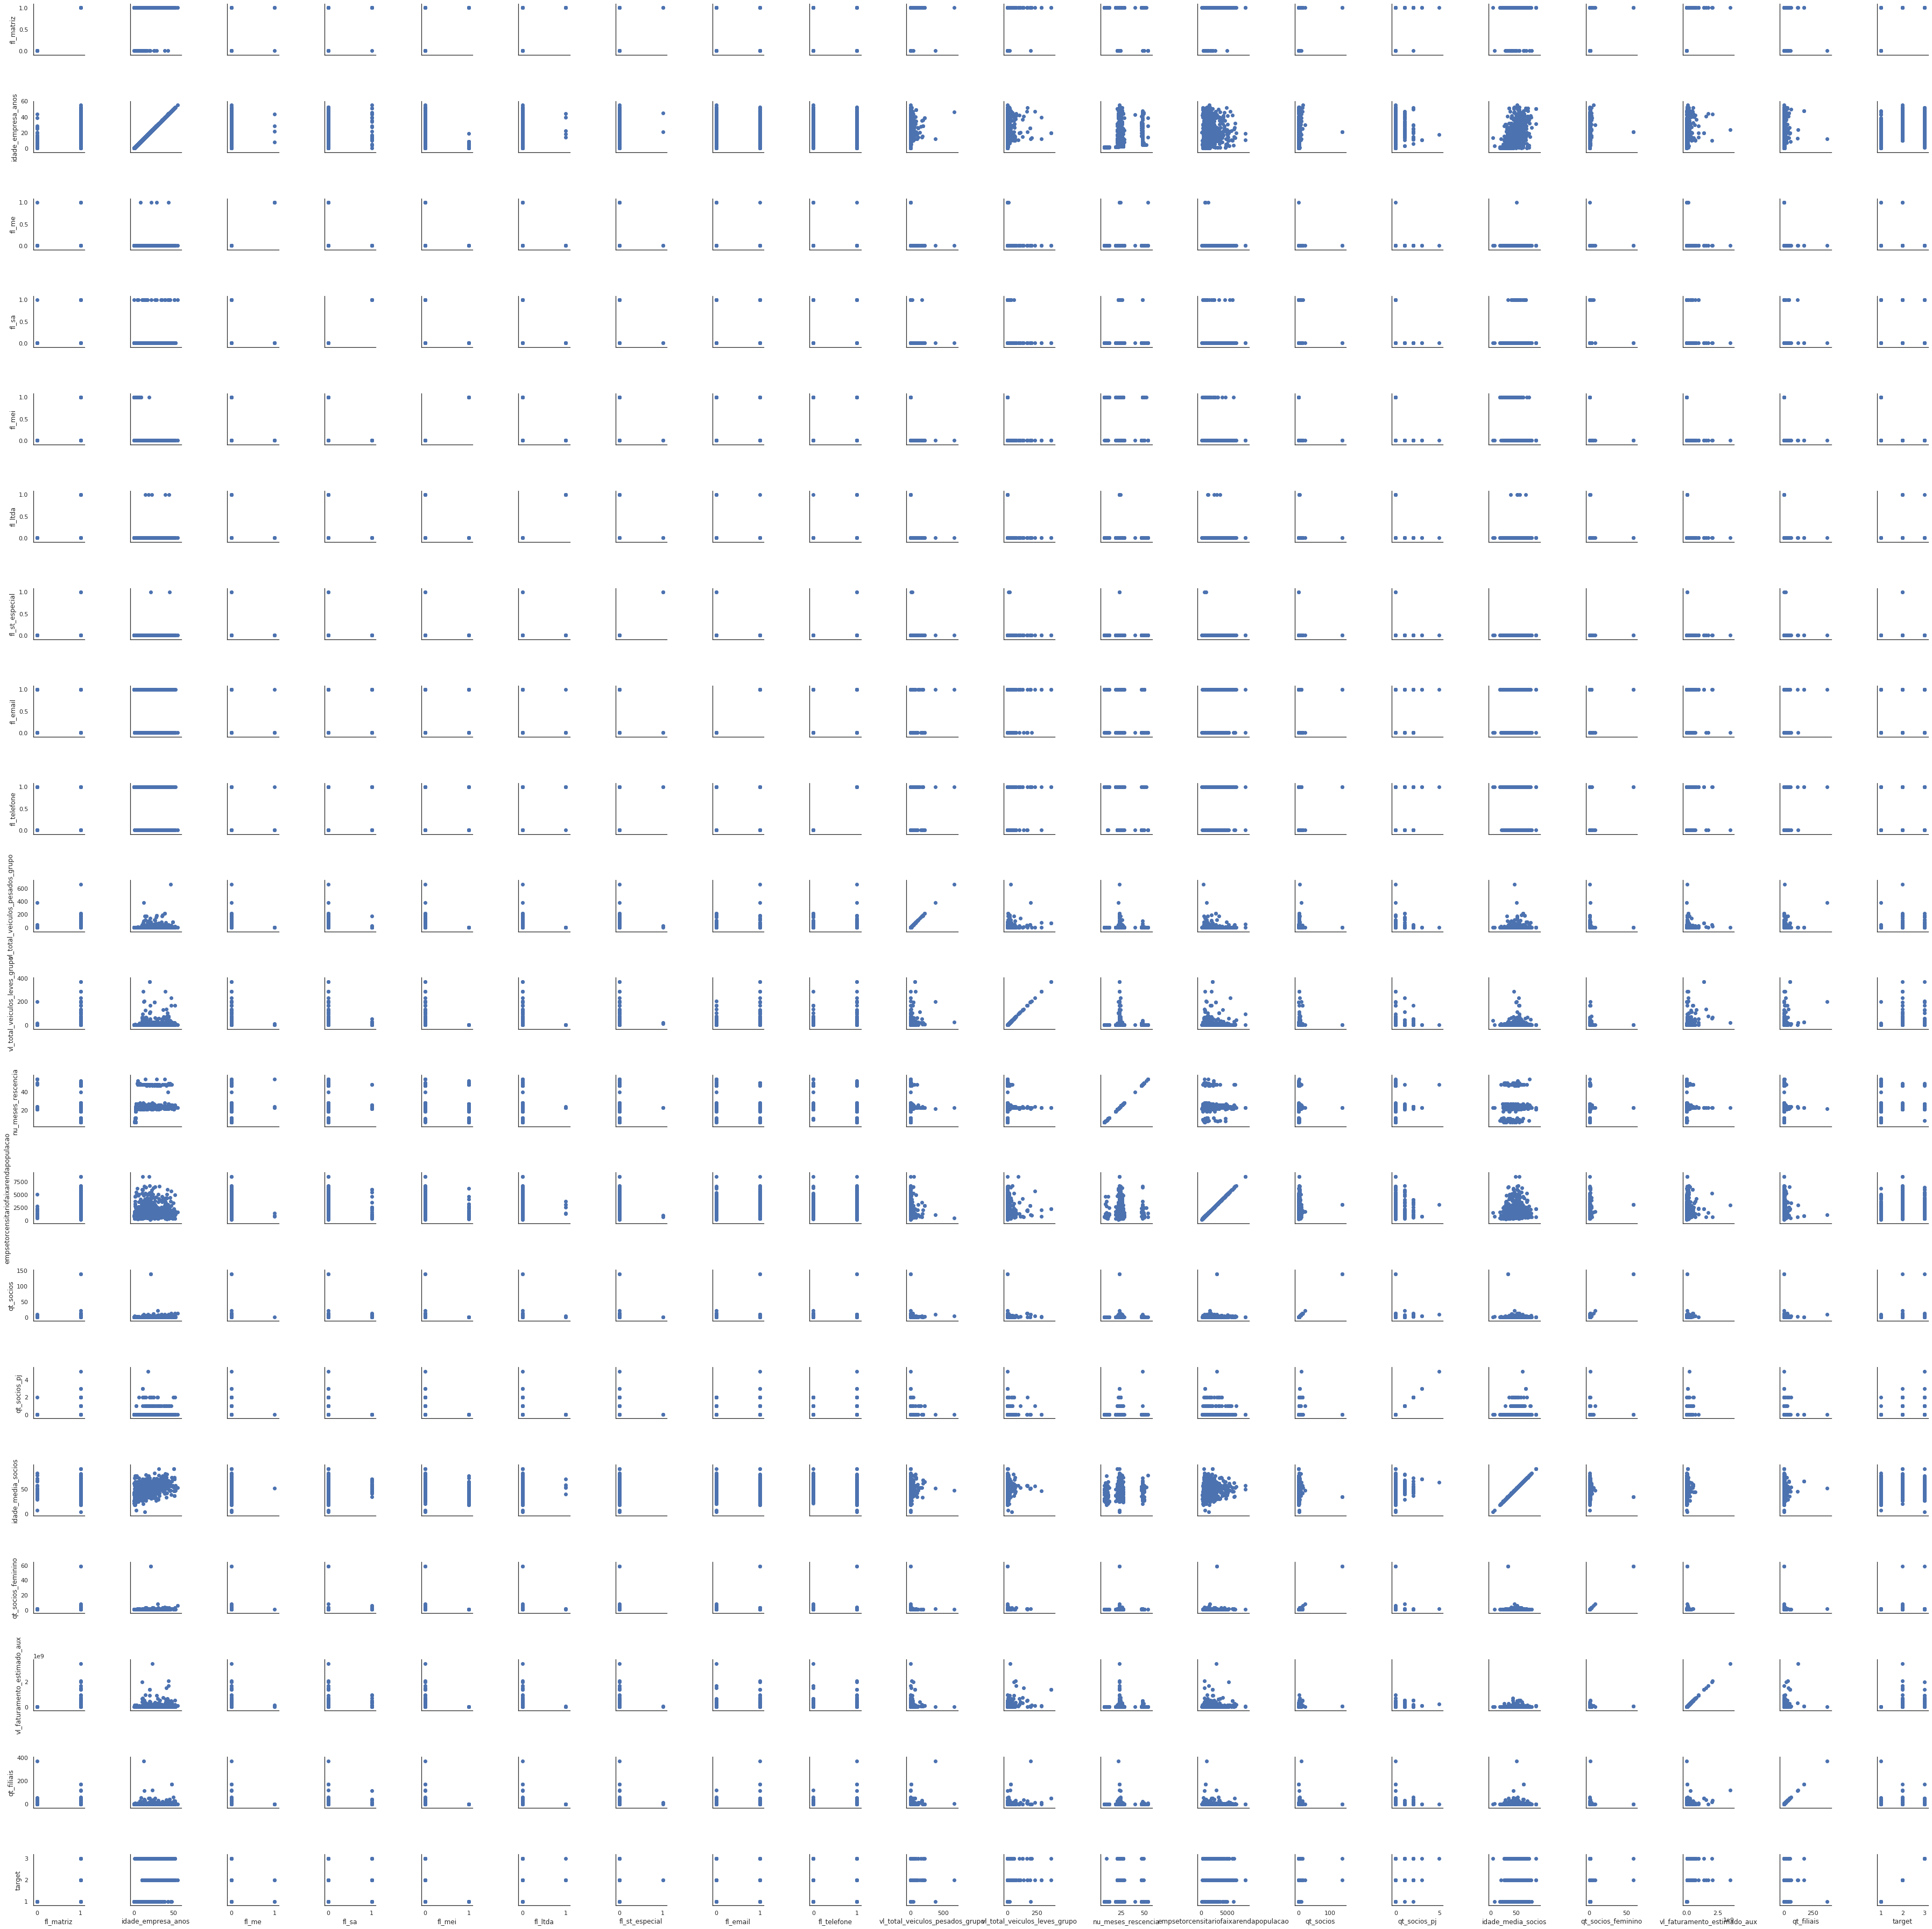

In [82]:
g=sns.PairGrid(df_filt_only_numeric)
g = g.map(plt.scatter)

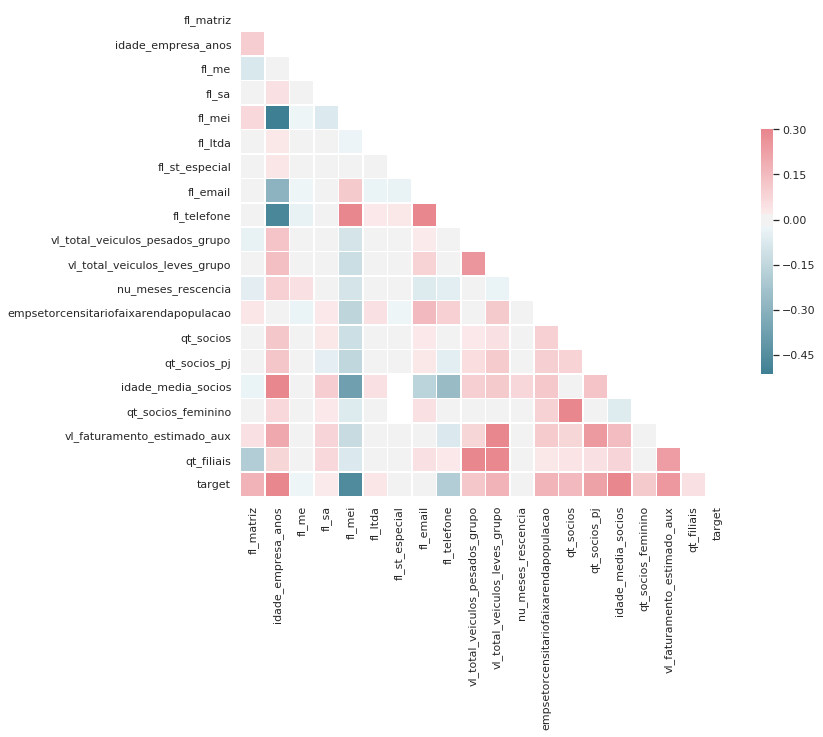

In [83]:
sns.set(style="white")
### Correlação entre va's numéricas
corr = df_filt_only_numeric.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###### Olhando para a matriz de correlação é possivel notar que não há variaveis fortemente correlacionadas entre si e com o target. Algumas variáveis como fl_me, fl_st_especial,fl_email e nu_meses_rescencia apresentam baixa correlação com o target, porém isso não diz se há uma dependencia entre as variáveis. Vamos verificar a influência destas variáveis no target.

#### fl_me x target

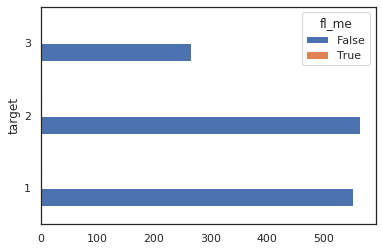

In [90]:
df_filt.groupby('fl_me').target.value_counts().unstack(0).plot.barh()

In [109]:
print("Eventos positivos:\n\n",df_filt.target[df_filt.fl_me==True])

Eventos positivos:

 207    1
406    1
602    2
629    2
Name: target, dtype: int64


###### Poucos eventos apresentam valor True, e mesmo assim quando estes são True podem ser da classe 1 ou 2. Em uma primeira tentativa eu excluiria essa variável

#### fl_st_especial x target

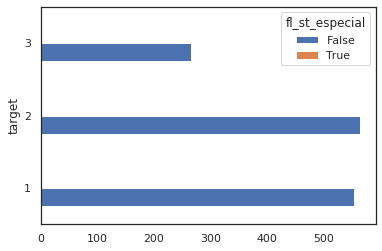

In [100]:
df_filt.groupby('fl_st_especial').target.value_counts().unstack(0).plot.barh()

In [108]:
print("Eventos positivos:\n\n",df_filt.target[df_filt.fl_st_especial==True])

Eventos positivos:

 780    2
944    2
Name: target, dtype: int64


###### Mesma observação porém agora só a classe 2 apresenta esse tipo de comportamento. Será que esta variável é realmente importante? Vou avaliar a classificação das classes sem ela e depois a adicionarei

#### fl_email x target

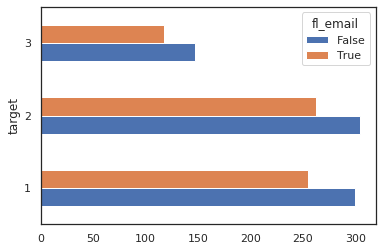

In [117]:
df_filt.groupby('fl_email').target.value_counts().unstack(0).plot.barh()

###### O conhecimento a priori de fl_email não muda a distribuição de probabilidade das contagems de eventos em cada target, ou seja, podemos supor uma fraca dependencia entre as variáveis

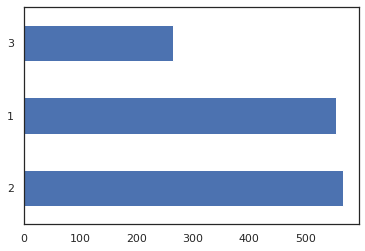

In [118]:
df_filt.target.value_counts().plot.barh()

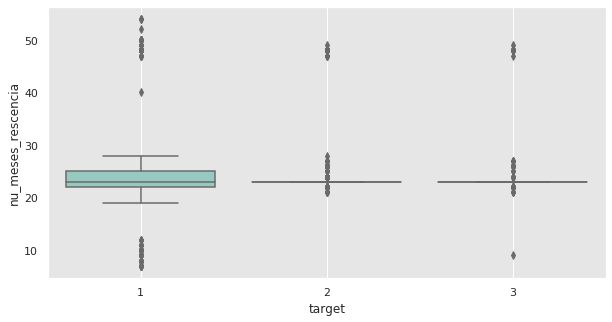

In [122]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="target", y="nu_meses_rescencia",
                 data=df_filt, palette="Set3")
plt.grid()

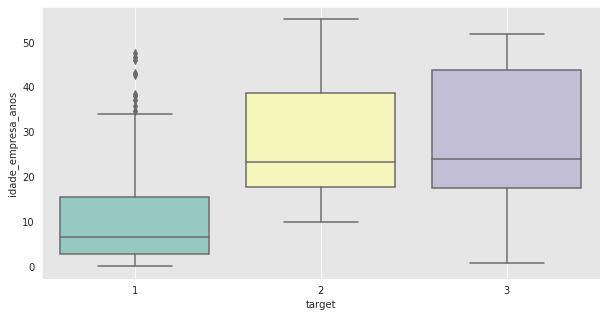

In [17]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="target", y="idade_empresa_anos",
                 data=df_filt, palette="Set3")
plt.grid()

#### Olhando para o box plot eu diria que a diferenciação dos clientes 2 e 3 fica dificil olhando somente para variavel idade_empresa_anos. É necessário observar a influência de outras variáveis nessa análise


##### Ramo

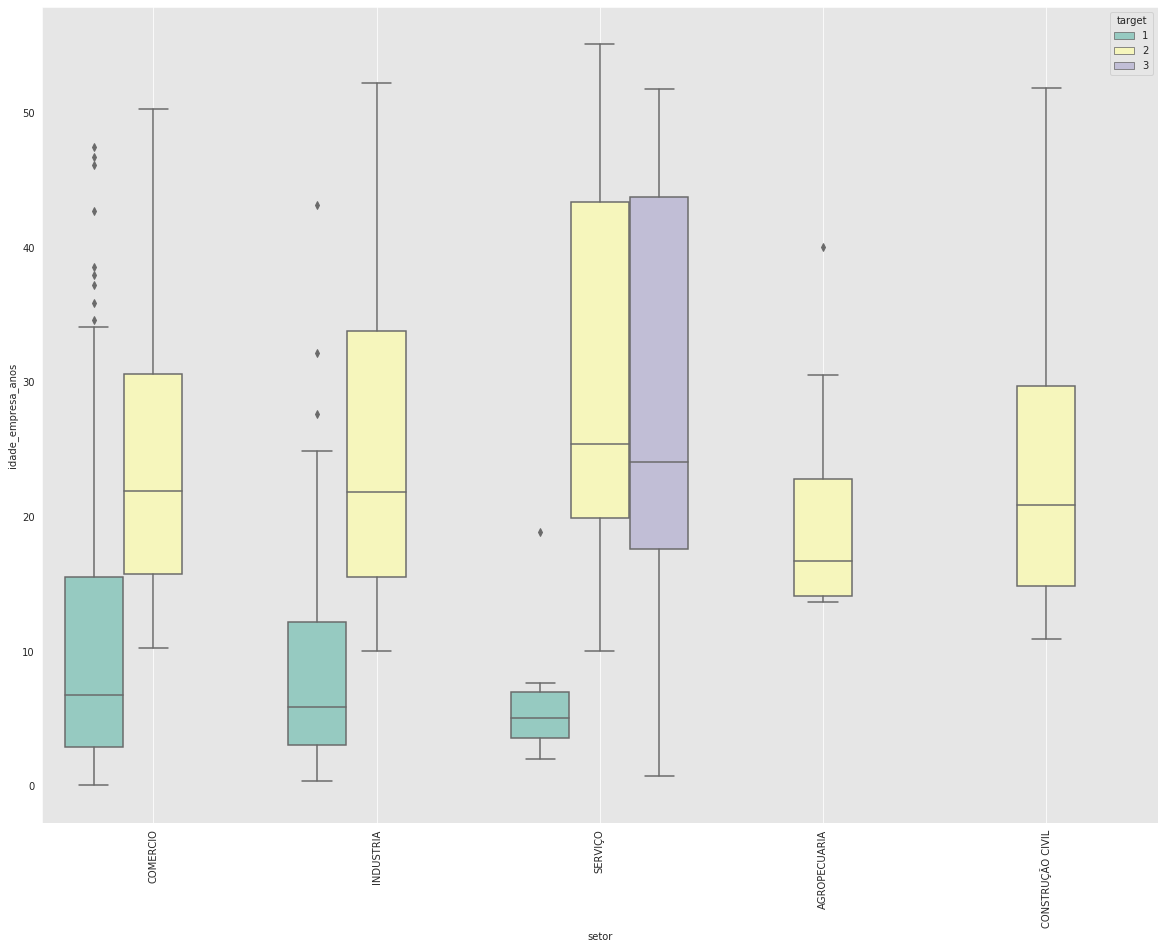

In [18]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="setor", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### É possível perceber que algumas empresas atuam em determinados setores e outras não. Essa variável pode ser muito importante para criação do modelo

##### Situação especial

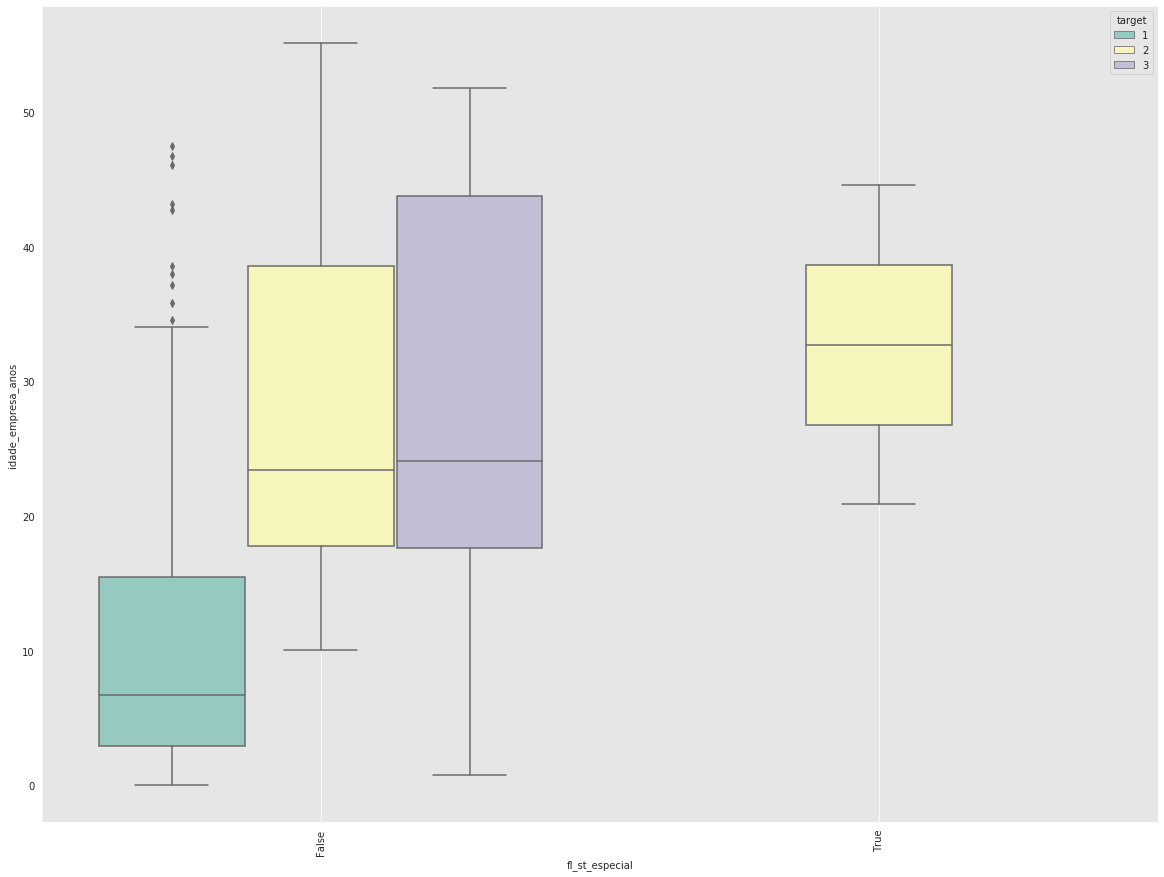

In [19]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="fl_st_especial", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Somente a empresa 2 possuí clientes com situação especial positiva, poderia também ser utilizado na diferenciação da mesma 

##### Saude tributária

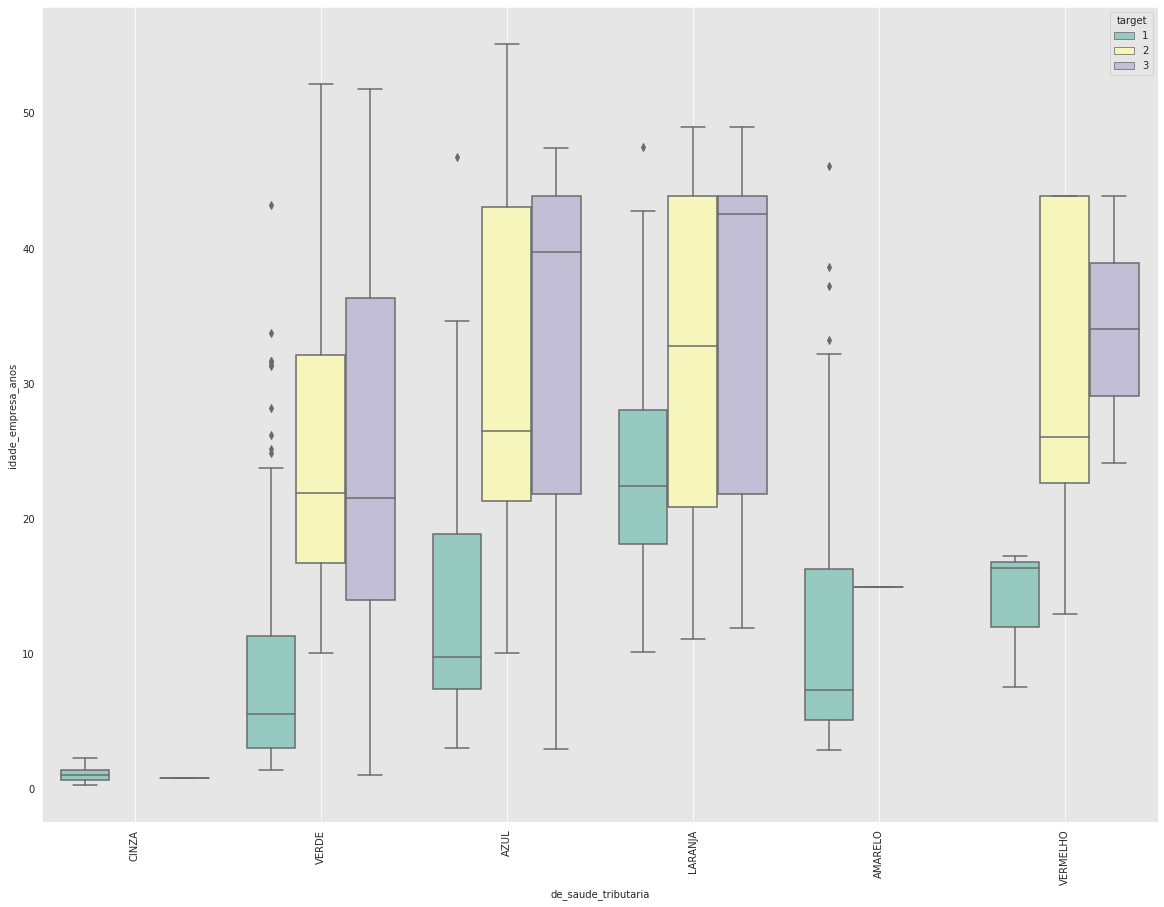

In [20]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="de_saude_tributaria", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Em alguns casos é possível destinguir o cliente 1 dos demais mas não sei ao certo se isso não seria redundante visto que pode ser feito através de outras features

#### Nivel de atividade

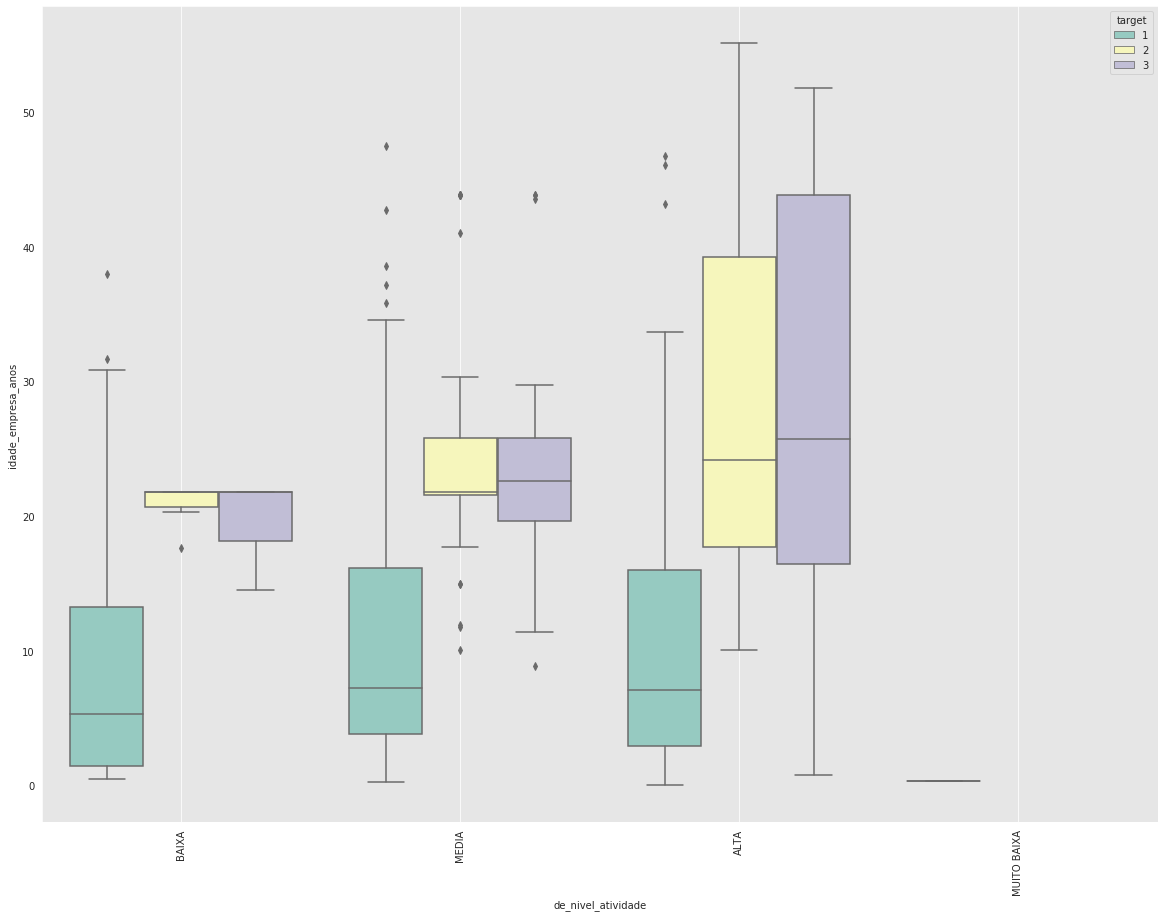

In [21]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="de_nivel_atividade", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Aqui conseguimos uma pequena diferenciação entre cliente 2 e 3 para o nivel de atividade baixo mas ainda não sei se é o que precisamos

##### Análise por regiao

In [22]:
e_regiao = {
    'AC': 'NORTE',
    'AL': 'NORDESTE',
    'AP': 'NORTE',
    'AM': 'NORTE',
    'BA': 'NORDESTE',
    'CE': 'NORDESTE',
    'DF': 'CENTRO-OESTE',
    'ES': 'SUDESTE',
    'GO': 'CENTRO-OESTE',
    'MA': 'NORDESTE',
    'MT': 'CENTRO-OESTE',
    'MS': 'CENTRO-OESTE',
    'MG': 'SUDESTE',
    'PA': 'NORTE',
    'PB': 'NORDESTE',
    'PR': 'SUL',
    'PE': 'NORDESTE',
    'PI': 'NORDESTE',
    'RJ': 'SUDESTE',
    'RN': 'NORDESTE',
    'RS': 'SUL',
    'RO': 'NORTE',
    'RR': 'NORTE',
    'SC': 'SUL',
    'SP': 'SUDESTE',
    'SE': 'NORDESTE',
    'TO': 'NORTE'
}

In [23]:
df_filt_by_region = df_filt.replace(e_regiao)

In [24]:
df_filt_by_region.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,nm_meso_regiao,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_st_especial,fl_rm,de_saude_tributaria,de_nivel_atividade,target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,NORDESTE,SUDOESTE PIAUIENSE,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,NAO,CINZA,BAIXA,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,NORDESTE,CENTRO MARANHENSE,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,False,NAO,VERDE,MEDIA,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,NORDESTE,NORTE MARANHENSE,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,False,SIM,AZUL,MEDIA,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,NORDESTE,OESTE POTIGUAR,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,False,NAO,VERDE,ALTA,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,NORDESTE,LESTE POTIGUAR,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,False,SIM,VERDE,ALTA,1


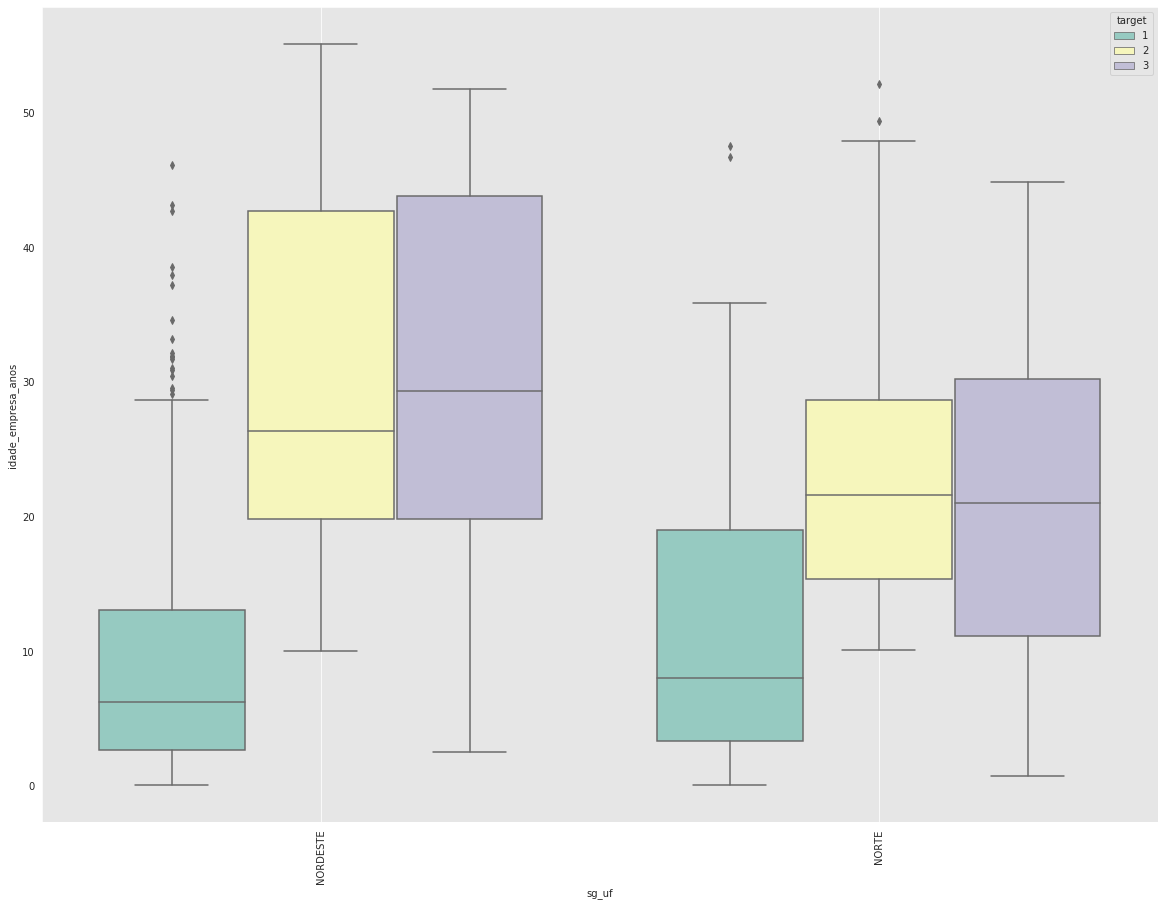

In [25]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="sg_uf", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt_by_region, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Temos só norte/nordeste

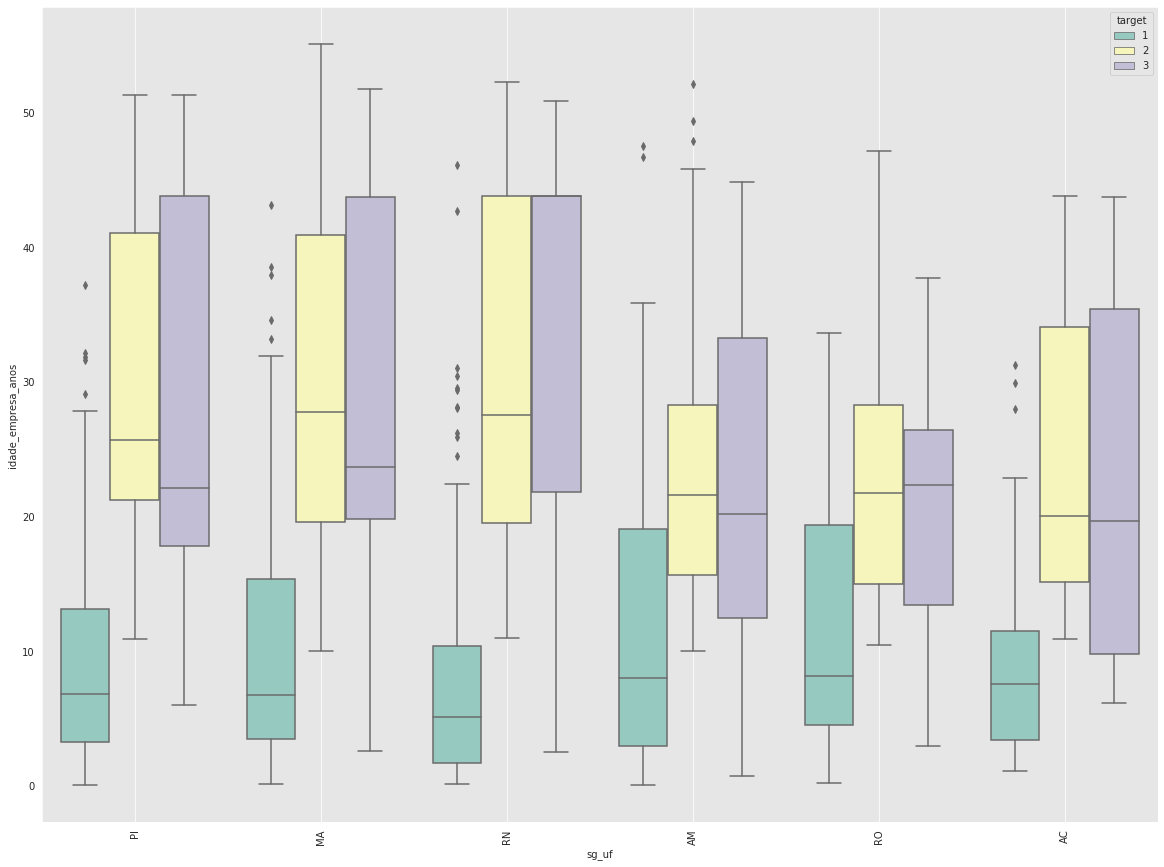

In [26]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="sg_uf", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()